In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_train = pd.read_csv("train.csv")
print("Train data shape = " + str(data_train.shape))

original_training_rows = data_train.shape[0]
data_train.head(n=5)

Train data shape = (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data_test = pd.read_csv("test.csv")
print("Test data shape = " + str(data_test.shape))
data_test.head(n=5)

Test data shape = (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# Look for Nan's in the train data

data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Look for Nan's in the test data

data_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
# separate column "Survived" from the others in the train data and save it to use as y
data_train_y = data_train.Survived
data_train_y = data_train_y.values
data_train_y = data_train_y.reshape(data_train_y.shape[0],1)

print("data_train_y shape: " + str(data_train_y.shape))
print(data_train_y[:5])

data_train_y shape: (891, 1)
[[0]
 [1]
 [1]
 [1]
 [0]]


In [7]:
# Drop column "Survived" from the training data and join the training data with the test data

data_train_x = data_train.drop(columns = ['Survived'])

data_x = np.concatenate((data_train_x, data_test), axis = 0)

print("data_x: " + str(data_x.shape))
print(data_x[:5])

data_x: (1309, 11)
[[1 3 'Braund, Mr. Owen Harris' 'male' 22.0 1 0 'A/5 21171' 7.25 nan 'S']
 [2 1 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)' 'female' 38.0 1
  0 'PC 17599' 71.2833 'C85' 'C']
 [3 3 'Heikkinen, Miss. Laina' 'female' 26.0 0 0 'STON/O2. 3101282' 7.925
  nan 'S']
 [4 1 'Futrelle, Mrs. Jacques Heath (Lily May Peel)' 'female' 35.0 1 0
  '113803' 53.1 'C123' 'S']
 [5 3 'Allen, Mr. William Henry' 'male' 35.0 0 0 '373450' 8.05 nan 'S']]


## Data prepration and feature engineering

In [8]:
# Analysis and preparation of column "Pclass":
# Passenger's class

pclass = data_x[:,1]
print("There are " + str(pd.isnull(pclass).sum()) + " nan's in the pclass column")
pclass_onehot = pd.get_dummies(pclass)
pclass_onehot = pclass_onehot.values

print(pclass_onehot[:5])

There are 0 nan's in the pclass column
[[0 0 1]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]]


In [9]:
# Analysis and preparation of column "Name":
# Passenger's name

name = data_x[:,2]
print("There are " + str(pd.isnull(name).sum()) + " nan's in the name column")

# First, separate the surname from the rest of the name
for i in range(len(name)):
    
    full_name = str(name[i])
    
    # First split: separate the surname from the rest of the name
    name_split_1 = full_name.split(sep = ', ', maxsplit=1)
    surname = name_split_1[0]
    title_and_name = name_split_1[1]
    
    # Second split: separate the title from the rest of the name
    name_split_2 = title_and_name.split(sep = '. ', maxsplit=1)
    
    title = name_split_2[0]
    first_name = name_split_2[1]
    
    
    if(i==0):
        titles = np.array(title).reshape(1,1)
        first_names = np.array(first_name).reshape(1,1)
        surnames = np.array(surname).reshape(1,1)
        
    else:
        titles = np.append(titles, np.array(title).reshape(1,1), axis = 0)
        first_names = np.append(first_names, np.array(first_name).reshape(1,1), axis = 0)
        surnames = np.append(surnames, np.array(surname).reshape(1,1), axis = 0)

There are 0 nan's in the name column


There are 18 different titles: {'Master', 'Miss', 'Dona', 'Mrs', 'Mme', 'Don', 'Dr', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'the Countess', 'Rev', 'Jonkheer', 'Mr', 'Capt', 'Ms'}


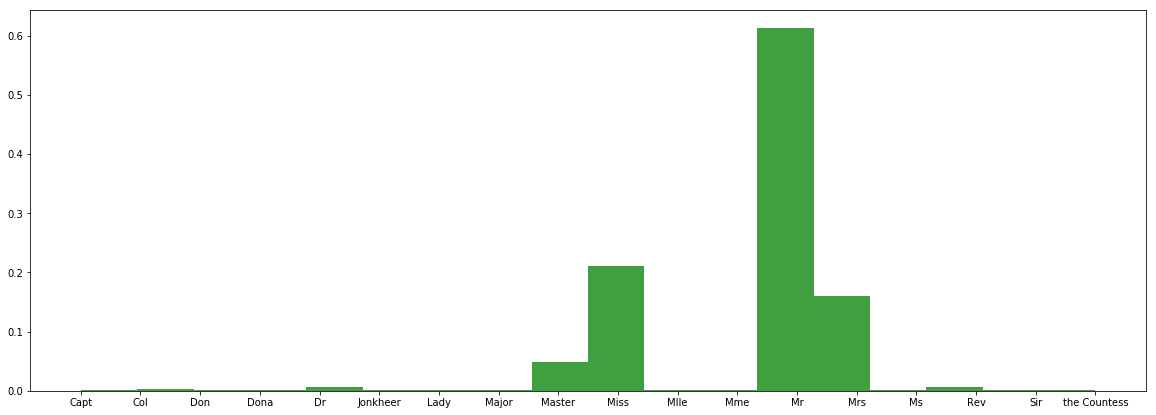

In [10]:
# Check the distribution for the titles:
titles = titles.reshape(titles.shape[0],)
titles_list = titles.astype(set)
unique_titles = set(titles_list)
print("There are " + str(len(unique_titles)) + " different titles: " + str(unique_titles))

plt.figure(figsize=(20,7))
n, bins, patches = plt.hist(titles_list, 18, normed=1, facecolor='g', alpha=0.75)

In [11]:
# Convert the titles to onehot

titles_onehot = pd.get_dummies(titles)
print(titles_onehot[:5])

   Capt  Col  Don  Dona  Dr  Jonkheer  Lady  Major  Master  Miss  Mlle  Mme  \
0     0    0    0     0   0         0     0      0       0     0     0    0   
1     0    0    0     0   0         0     0      0       0     0     0    0   
2     0    0    0     0   0         0     0      0       0     1     0    0   
3     0    0    0     0   0         0     0      0       0     0     0    0   
4     0    0    0     0   0         0     0      0       0     0     0    0   

   Mr  Mrs  Ms  Rev  Sir  the Countess  
0   1    0   0    0    0             0  
1   0    1   0    0    0             0  
2   0    0   0    0    0             0  
3   0    1   0    0    0             0  
4   1    0   0    0    0             0  


In [12]:
# Analysis and preparation of column "Sex":
# Passenger's sex

sex = data_x[:,3]
print("There are " + str(pd.isnull(sex).sum()) + " nan's in the sex column")
sex_onehot = pd.get_dummies(sex)
sex_onehot = sex_onehot.values
print(sex_onehot[:5])

print(sex)

There are 0 nan's in the sex column
[[0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]]
['male' 'female' 'female' ..., 'male' 'male' 'male']


In [13]:
# Analysis and preparation of column "Age":
# Passenger's age

age = data_x[:,4]
print("There are " + str(pd.isnull(age).sum()) + " nan's in the age column")
age = age.reshape(age.shape[0],1)

# Let's not use this one for now, too many nan's

There are 263 nan's in the age column


In [14]:
# Analysis and preparation of column "SibSp":
# Number of siblings/spouses aboard

sibsp = data_x[:,5]
print("There are " + str(pd.isnull(sibsp).sum()) + " nan's in the sibsp column")
sibsp_onehot = pd.get_dummies(sibsp)
sibsp_onehot = sibsp_onehot.values

print(sibsp_onehot[:5])

There are 0 nan's in the sibsp column
[[0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0]]


In [15]:
# Analysis and preparation of column "Parch"
# Number of parents/children aboard

parch = data_x[:,6]
parch_onehot = pd.get_dummies(parch)
parch_onehot = parch_onehot.values

print(parch_onehot[:5])

[[1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]]


In [16]:
# Analysis and preparation of column "Ticket":
# Ticket number

ticket = data_x[:,7]

print("There are " + str(pd.isnull(ticket).sum()) + " nan's in the ticket column")

# Separate the ticket prefix from the ticket number
for i in range(len(ticket)):
    
    full_ticket = str(ticket[i])
    ticket_split_1 = full_ticket.split(sep = ' ', maxsplit=1)
    
    
    if(len(ticket_split_1) == 1):
        ticket_prefix = 'generic'
        ticket_number = ticket_split_1[0]

    else:
        ticket_prefix = 'non_generic'
        ticket_number = ticket_split_1[1]
        
    
    if(i==0):
        ticket_prefixes = np.array(ticket_prefix).reshape(1,1)
        ticket_numbers = np.array(ticket_number).reshape(1,1)

    else:
        ticket_prefixes = np.append(ticket_prefixes, np.array(ticket_prefix).reshape(1,1), axis = 0)
        ticket_numbers = np.append(ticket_numbers, np.array(ticket_number).reshape(1,1), axis = 0)

# For now, only the ticket prefix will be used in the model

ticket_prefixes = ticket_prefixes.reshape(age.shape[0],)
ticket_prefixes_onehot = pd.get_dummies(ticket_prefixes)
ticket_prefixes_onehot = ticket_prefixes_onehot.values

print(ticket_prefixes_onehot[:5])


There are 0 nan's in the ticket column
[[0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]]


In [17]:
# Analysis and preparation of column "Fare":
# Fare



In [18]:
# Analysis and preparation of column "Cabin":
# Cabin

cabin = data_x[:,9]
print("There are " + str(pd.isnull(cabin).sum()) + " nan's in the cabin column, representing passengers that didn't have a cabin")



for i in range(len(cabin)):
    
    cabin_number = str(cabin[i])
    if(cabin_number == 'nan'):
        deck = 'N'
        
    else:
        deck = cabin_number[0]
        
    if(i==0):
        cabin_deck = np.array(deck).reshape(1,1)

    else:
        cabin_deck = np.append(cabin_deck, np.array(deck).reshape(1,1), axis = 0)


        
cabin_deck = cabin_deck.reshape(cabin_deck.shape[0],)

cabin_deck_onehot = pd.get_dummies(cabin_deck)
cabin_deck_onehot = cabin_deck_onehot.values
        
print(cabin_deck_onehot[:5])

There are 1014 nan's in the cabin column, representing passengers that didn't have a cabin
[[0 0 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0]]


In [19]:
# Analysis and preparation of column "Embarked"
# Port of embarkation

embarked = data_x[:,10]
embarked_onehot = pd.get_dummies(embarked)
v_onehot = embarked_onehot.values

print(embarked_onehot[:5])


   C  Q  S
0  0  0  1
1  1  0  0
2  0  0  1
3  0  0  1
4  0  0  1


## Prepare the processed data to use in the model

In [20]:
pclass_onehot = np.array(pclass_onehot, dtype=float)
sex_onehot = np.array(sex_onehot, dtype=float)
age = np.array(age, dtype=float)
sibsp_onehot = np.array(sibsp_onehot, dtype=float)
parch_onehot = np.array(parch_onehot, dtype=float)
embarked_onehot = np.array(embarked_onehot, dtype=float)

data_x_final = np.concatenate((pclass_onehot, sex_onehot, sibsp_onehot, parch_onehot, titles_onehot, ticket_prefixes_onehot, cabin_deck_onehot), axis = 1)

print("data_x_final shape: " + str(data_x_final.shape))
print(data_x_final[:5])


data_x_final shape: (1309, 49)
[[ 0.  0.  1.  0.  1.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
   0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 1.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
   0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  1.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 1.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
   0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  1.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
   0.  0.

In [21]:
# Split into train and test sets

x_train = data_x_final[0:original_training_rows,:]
x_test = data_x_final[original_training_rows:,:]


# Logistic Regression

In [24]:
# Fit a logistic regression model

from sklearn import linear_model
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

data_train_y = data_train_y.reshape(data_train_y.shape[0],)

#x_train = StandardScaler().fit_transform(x_train)

clf = linear_model.LogisticRegression(C=1e5)
#clf = RandomForestClassifier(max_depth=2, random_state=0)
#clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(49, 20, 10, 1), random_state=1)

clf.fit(x_train, data_train_y)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [26]:
# Apply the trained model to the test set

predicted = clf.predict(x_test)

predicted_passengerid = data_test.PassengerId.values
predicted_passengerid = predicted_passengerid.reshape(predicted_passengerid.shape[0],1)
    
predicted = predicted.reshape(predicted.shape[0],1)

predicted_df = np.concatenate((predicted_passengerid ,predicted), axis = 1)
predicted_df = pd.DataFrame(predicted_df)
predicted_df.columns = ['PassengerId','Survived']
predicted_df.head(n=5)

predicted_df.to_csv('predicted.csv', index=False)

In [ ]:
# After submitting the file to Kaggle:

![Logistic Regression score](https://raw.githubusercontent.com/jgamboias/Titanic/master/logreg_submission.png)